## GMM

In [4]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

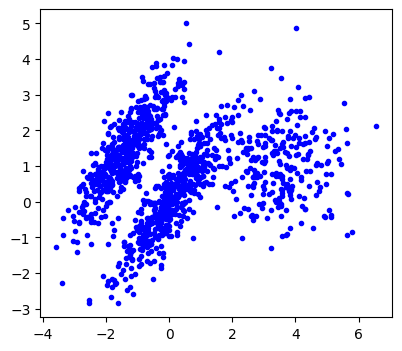

In [8]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(X1[:, 0], X1[:, 1], "b.")
plt.plot(X2[:, 0], X2[:, 1], "b.")

In [10]:
from sklearn.mixture import GaussianMixture

In [11]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [12]:
gm.converged_

True

In [13]:
gm.n_iter_

4

In [14]:
# Hard Clustering
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1])

In [16]:
# Soft Clustering
gm.predict_proba(X).round(2)

array([[0.  , 0.02, 0.98],
       [0.  , 0.02, 0.98],
       [1.  , 0.  , 0.  ],
       ...,
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ]])

### Generate new samples

In [17]:
X_new, y_new = gm.sample(6)
X_new

array([[-2.32491052,  1.04752548],
       [-1.16654983,  1.62795173],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [ 0.38079484, -0.56239369]])

In [18]:
y_new

array([0, 0, 1, 1, 1, 2])

In [19]:
gm.predict(X_new)

array([0, 0, 2, 1, 1, 2])

In [21]:
gm.predict_proba(X_new).round(2)

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.34, 0.66],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.01, 0.99]])

### Density Estimation

In [25]:
gm.score_samples(X).round(2)

array([-2.61, -3.57, -3.33, ..., -3.51, -4.4 , -3.81])

### Anomaly Detection

In [26]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]

In [29]:
anomalies.shape

(25, 2)

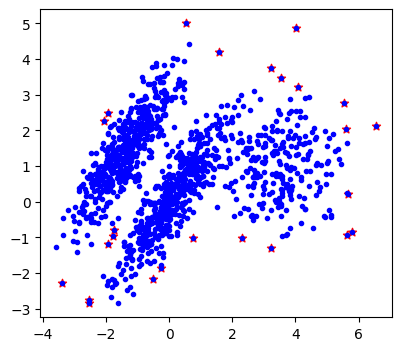

In [32]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(X1[:, 0], X1[:, 1], "b.")
plt.plot(X2[:, 0], X2[:, 1], "b.")
plt.scatter(anomalies[:, 0], anomalies[:, 1], color="r", marker='*')

### Evaluation

In [33]:
gm.bic(X)

np.float64(8189.733705221636)

In [34]:
gm.aic(X)

np.float64(8102.508425106598)